# Graph performance metrics Part 1: Diameter and average path length

## MTH 325, Fall 2016 

## Overview

Over the next few class meetings, we'll be learning about the general topic of __performance metrics__ for a graph. As we know, graphs can be used to model networks of all sorts. The purpose of modeling with graphs is to use mathematical theorems as well as algorithms to discover information about the networks they model. In practice, professionals focus on three particular properties of graphs, called *performance metrics*, that give general information about graphs and networks: 

1. The **diameter** of a graph
2. The **clustering coefficient** of a graph
3. The **centrality** of a vertex in a graph

These three metrics are numerical measures -- each being a number that we compute from a given graph, and the numbers give us broad information about the network and the nodes in it. We'll spend one day each discussing these metrics. 

## The distance between nodes in a graph

Some networks are "wider" than others, in the sense that in some networks there could be nodes that are quite "far apart" while other networks have nodes that are all very "close together". For example, the complete graph is the epitome of graphs in which the nodes are "close together": 

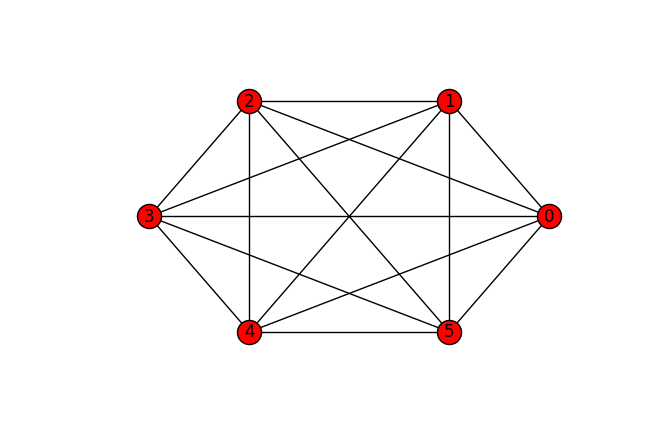

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

k6 = nx.complete_graph(6)
nx.draw_circular(k6, with_labels=True)
plt.show()

It may look like some of these nodes are closer than others. For example, visually it appears that node 3 is closer to node 2 than it is to node 0. But this is just an optical illusion because _all of these nodes are equally close to each other_ -- every pair of nodes is connected by an edge. No two of them are further apart than 1 edge. 

On the other hand, look at the path graph on 6 vertices: 

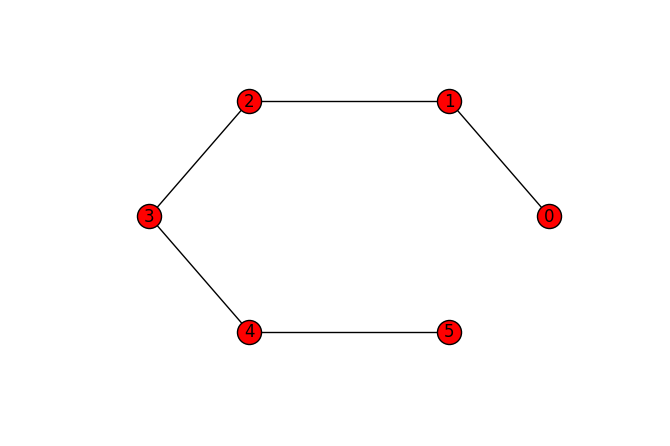

In [5]:
p6 = nx.path_graph(6)
nx.draw_circular(p6, with_labels=True)
plt.show()

Here, nodes 0 and 5 are quite far apart despite being visually near each other -- they are separated by a path of length 5. 

Since graphs are just abstractions and can be laid out visually in many different ways, we have to measure the _distance between nodes_ in some way other than visual or even using geometry. It makes more sense to measure distance in terms of path length. For example, the distance from 0 to 5 in $K_6$ is 1; the distance from 0 to 5 in $P_6$ is 5. 

This motivates the following definition: 

>Let $i$ and $j$ be any two nodes in a graph. The **distance** from $i$ to $j$ is denoted $d(i,j)$ and is defined to be the length of the shortest path between $i$ and $j$. 

**Example:** Consider this graph: 

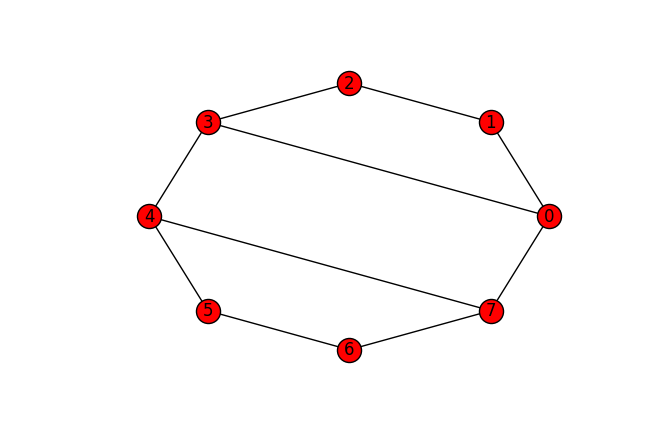

In [7]:
g = nx.Graph([(0, 1), (0, 3), (0, 7), (1, 2), (2, 3), (3, 4),
 (4, 5), (4, 7), (5, 5), (5, 6), (6, 7)])

nx.draw_circular(g, with_labels = True)
plt.show()

Look at nodes 0 and 3. There are a lot of paths from 0 to 3; for example 0, 1, 2, 3 is a path and so is 0, 7, 6, 5, 4, 3. The distance $d(0,3)$ is the length of the _shortest_ path between those nodes, which in this case is 1 because there is a direct edge between the two nodes. On the other hand, $d(0,4) = 2$ because the shortest path from 0 to 4 has length 2. Here is a table listing all the distances between two different nodes: 

|  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 
|:-| :-| :-| :-| :-| :-| :-| :-| :-|
| 0| 0 | 1 | 2 | 1 | 2 | 3 | 2 | 1 | 
| 1|   | 0 | 1 | 2 | 3 | 4 | 3 | 2 | 
| 2|   |   | 0 | 1 | 2 | 3 | 4 | 3 | 
|3 |   |   |   | 0 | 1 | 2 | 3 | 2 | 
| 4|   |   |   |   | 0 | 1 | 2 | 1 | 
| 5|   |   |   |   |   | 0 | 1 | 2 | 
| 6|   |   |   |   |   |   | 0 | 1 | 
| 7|   |   |   |   |   |   |   | 0 | 

(The bottom half of the table is symmetrical to the top half. For example $d(3,5) = d(5,3)$ and clearly this is the case for any pair of nodes.) 


## The diameter of a graph

Now that we have a way of discussing the distance between nodes in a graph, we can define our first graph performance metric. 

The word "diameter" from geometry refers to the distance between literally "diametrically opposite" points on a circle. It denotes the furthest possible distance that one could travel on a circle. In a graph, something similar is useful information: the furthest distance one could possible travel between nodes in a graph. For example, if all the nodes in a graph are relatively close to each other in terms of the distance metric we defined above, that graph has fundamentally different characteristics than one that has a pair of nodes that are far apart. 

Here's the definition: 

>The **diameter** of a graph is the largest distance between any two nodes in the graph. That is, 
$$\text{diameter} = \max_{i,j} d(i,j)$$

This means: Look at all the distances between any two nodes in the graph, ranging over all possible pairs of nodes. The diameter is the largest distance encountered. 

Examples: 

+ The diameter of $K_n$ is 1, since $d(i,j) = 1$ for all nodes $i,j$ and therefore $\max_{i,j} d(i,j) = 1$. 
+ The diameter of $P_n$ is $n-1$. 
+ The diameter of the example graph above is 4. All the possible distances are given in the table, and the largest distance encountered is 4. There are two pairs of vertices that have this distance -- 1 and 5, and 2 and 6.  

Think about the following: Suppose you had a graph that models a social network like Facebook. What would it mean about the social network if the graph had a somewhat large diameter? What would it mean if the diameter were small? 

## Average path length

A related and useful metric about graphs is the _average path length_. This is a metric that measures the average distance between any two nodes in the network. It's calculated as follows: 

$$\text{average path length} = \frac{\sum_{i \geq j} d(i,j)}{\frac{n(n-1)}{2}}$$

The formula needs a little explaining obviously:

+ The numerator of the fraction is a sum of distances. It's taken over all pairs of nodes $i,j$ with $i \geq j$. The inequality is there to keep us from double-counting because $d(i,j) = d(j,i)$ for any pair of nodes, and we don't want to add up $d(i,j)$ twice. 
+ You might have been expecting the denominator to be something like "the number of paths in the graph" since we are finding an "average path length". However we have the fraction $\frac{n(n-1)}{2}$. What does this represent? Well, remember that the complete graph $K_n$ has this many edges, which you can check using the Handshaking Theorem. So what we are dividing by here to get our "average" is the maximum number of edges possible for a graph with $n$ vertices. 

Why does this calculate the average distance between any two nodes? It's clear that the sum on top is adding up all the possible distances between nodes in the graph. By dividing off by $\frac{n(n-1)}{2}$ we rescale this sum to put it in terms of a ratio of how far apart nodes are compared to the complete graph on $n$ vertices. Also note that this fraction is the binomial coefficient $\binom{n}{2}$ which gives the number of ways to choose a pair of vertices from the $n$ that are in the graph, so this fraction counts the number of possible paths in the sense of being the number of possible start and end points of a path. 

Examples: 

+ In $K_n$, we have $d(i,j) = 1$ for all pairs of vertices. The number of times we add up "1" here is the number of ways to choose 2 nodes without caring about the ordering. The number of ways to do this is found with the binomial coefficient $\binom{n}{2}$. Therefore the average path length is: 
$$\frac{\binom{n}{2}}{\frac{n(n-1)}{2}} = \frac{\frac{n(n-1)}{2}}{\frac{n(n-1)}{2}} = 1$$
That seems to make sense since all the nodes in $K_n$ are just one edge apart. 
+ In the graph from the example above where the diameter was 4, we can find the average path length by using the table of distances: 

|  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | SUM |
|:-| :-| :-| :-| :-| :-| :-| :-| :-|:---: | 
| 0| 0 | 1 | 2 | 1 | 2 | 3 | 2 | 1 | 12  | 
| 1|   | 0 | 1 | 2 | 3 | 4 | 3 | 2 | 14  | 
| 2|   |   | 0 | 1 | 2 | 3 | 4 | 3 | 13 | 
|3 |   |   |   | 0 | 1 | 2 | 3 | 2 | 8  | 
| 4|   |   |   |   | 0 | 1 | 2 | 1 | 4 | 
| 5|   |   |   |   |   | 0 | 1 | 2 | 3 | 
| 6|   |   |   |   |   |   | 0 | 1 | 1 | 
| 7|   |   |   |   |   |   |   | 0 | 0 | 
|SUM|  |   |   |   |   |   |   |   | *55* | 

Since $n = 8$ for this graph, the average path length is $\frac{55}{(8 \cdot 7)/2} \approx 1.964$. This means it takes just under 2 edges on the average to get between any two nodes in the graph. If that seems surprisingly low to you, note that 11 of the 28 pairs of nodes in this graph are only one edge apart. There are a handful of big-distance nodes but they are balanced by the distances of 1 and 2 that predominate. 

## Finding diameter and average path length in Python/networkX

Diameter is easy to find: use the `.diameter` method. 

In [8]:
g = nx.Graph([(0, 1), (0, 3), (0, 7), (1, 2), (2, 3), (3, 4),
 (4, 5), (4, 7), (5, 5), (5, 6), (6, 7)])

nx.diameter(g)

4

In [9]:
nx.diameter(nx.complete_graph(10))

1

Average path length is also easy: Use the method `.average_shortest_path_length`.

In [12]:
nx.average_shortest_path_length(g)

2.0

There's a bit of roundoff error in this calculation because of floating point issues. 

However, we don't like using Python as a black box where we just plug thing in... so how would you write code to have Python make these calculations? 